## Nonlinear Features

This notebook explores how adding nonlinear transformation of predictors improves (or doesn't) model fit.

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
#this will allow us to see all the columns of the data frame when we display it.
pd.set_option('display.max_columns', 150)

In [3]:
# we'll use these later in the notebook
novotny_features = ['WRF+DOMINO', 'Impervious_6000', 'Major_800', 'total_100', 'Major_100', 'Major_200', 'Elevation_truncated_km', 'Distance_to_coast_km', 'Population_800', 'total_800'];

In [4]:
df_all = pd.read_csv('BechleLUR_2006_allmodelbuildingdata.csv')

In [8]:
df_all.tail()

,Monitor_ID,State,Latitude,Longitude,Observed_NO2_ppb,Predicted_NO2_ppb,WRF+DOMINO,Distance_to_coast_km,Elevation_truncated_km,Impervious_100,Impervious_200,Impervious_300,Impervious_400,Impervious_500,Impervious_600,Impervious_700,Impervious_800,Impervious_1000,Impervious_1200,Impervious_1500,Impervious_1800,Impervious_2000,Impervious_2500,Impervious_3000,Impervious_3500,Impervious_4000,Impervious_5000,Impervious_6000,Impervious_7000,Impervious_8000,Impervious_10000,Population_100,Population_200,Population_300,Population_400,Population_500,Population_600,Population_700,Population_800,Population_1000,Population_1200,Population_1500,Population_1800,Population_2000,Population_2500,Population_3000,Population_3500,Population_4000,Population_5000,Population_6000,Population_7000,Population_8000,Population_10000,Major_100,Major_200,Major_300,Major_400,Major_500,Major_600,Major_700,Major_800,Major_1000,Major_1200,Major_1500,Major_1800,Major_2000,Major_2500,Major_3000,Major_3500,Major_4000,Major_5000,Major_6000,Major_7000,Major_8000,Major_10000,Resident_100,Resident_200,Resident_300,Resident_400,Resident_500,Resident_600,Resident_700,Resident_800,Resident_1000,Resident_1200,Resident_1500,Resident_1800,Resident_2000,Resident_2500,Resident_3000,Resident_3500,Resident_4000,Resident_5000,Resident_6000,Resident_7000,Resident_8000,Resident_10000,Resident_10500,Resident_11000,Resident_11500,Resident_12000,Resident_12500,Resident_13000,Resident_13500,Resident_14000,total_100,total_200,total_300,total_400,total_500,total_600,total_700,total_800,total_1000,total_1200,total_1500,total_1800,total_2000,total_2500,total_3000,total_3500,total_4000,total_5000,total_6000,total_7000,total_8000,total_10000,total_10500,total_11000,total_11500,total_12000,total_12500,total_13000,total_13500,total_14000
364,56-005-0892-42602-1,WY,44.098889,-105.342778,7.645147,3.205602,-0.638296,1951.1,0.304,1.7155,1.3762,1.2529,1.1902,1.1902,1.2279,1.2616,1.2893,1.2984,1.2452,1.1766,1.1530,1.1580,1.2203,1.3012,1.3963,1.4431,1.3891,1.3173,1.2637,1.2115,1.1282,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0000,4.0000,4.0000,3.9073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00000,0.00000,0.0000,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.32331,0.90132,2.00149,2.80916,3.86643,6.32626,8.51787,10.49905,12.68530,13.89047,23.19020,32.13412,40.25384,50.77572,73.64435,107.51885,133.68991,166.74369,238.96848,268.03423,289.84379,309.27564,328.99246,350.37517,372.58318,395.35640,415.89948,0.0,0.0,0.0,0.32331,0.90132,2.00149,2.80916,3.86643,6.32626,8.51787,10.49905,12.68530,13.89047,23.19020,32.13412,40.25384,50.77572,73.64435,107.51885,133.68991,166.74369,238.96848,268.03423,289.84379,309.27564,328.99246,350.37517,375.67211,403.22799,427.17079
365,56-035-0098-42602-1,WY,42.429353,-109.695747,11.247936,3.378311,-1.136800,1535.9,0.304,2.0000,2.0000,2.0136,2.0584,1.9964,1.9479,1.9137,1.8889,1.8405,1.7661,1.6110,1.4646,1.3712,1.2214,1.1260,1.0531,0.9938,0.9491,0.9943,0.9695,0.9544,0.8851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00000,0.00000,0.0000,0.000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.85866,1.94297,4.20300,6.27520,9.06336,10.90246,14.56430,25.59562,42.24443,55.42551,92.80140,104.10897,117.45969,128.75877,140.98323,150.79805,160.58003,170.52602,180.98831,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.85866,1.94297,4.20300,6.27520,9.06336,10.90246,14.56430,25.59562,42.24443,55.42551,92.80140,104.10897,117.45969,128.75877,140.98323,150.79805,160.58003,170.52602,180.98831
366,56-035-0099-42602-1,WY,42.720594,-109.752875,2.267546,3.126521,-1.478724,1549.0,0.304,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0127,2.0067,1.9670,1.8576,1.6932,1.54

### One-hot encoding (transforming categorical variables)

As we discussed in lecture, categorical variables can't be used directly in a statistical learning algorithm.  We need to transform them to binary variables; if there are $n$ categories we need at least $n-1$ binary variables to represent them.  

Pandas has a nice "one-hot encoder" that will automatically take your categorical data and turn it into this binary style.

Let's explore this with the "State" feature in the Novotny data set.

In [6]:
print("The number of states in the data set is", df_all.State.unique().size)

The number of states in the data set is 44


So we expect that the a one-hot encoder will create at least 43 new binary variables to represent these categories.

In [7]:
pd.get_dummies(df_all.State)

,AR,AZ,CA,CO,CT,DC,DE,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MT,NC,ND,NH,NJ,NM,NV,NY,OH,OK,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WY
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Now you can see that `get_dummies` took a single column of the data frame and transformed it into a dataframe of 44 columns.  

In this case it is giving you a column for every single category (state).  If you wish, when you're building models, you could drop one of those columns.  If all the other columns are zero you'd know that the column you dropped must have been a 1, so all the information you need is encoded in 43 columns.  

### Initial model fit

There's actually no reason to believe that crossing state borders would lead to a discrete shift in air quality, so we're not actually going to use the State variable in our models -- it was just an expositional exercise.  

Let's go ahead and start building models with the Novotny data set.

In [9]:
X = df_all.loc[:,['WRF+DOMINO']]
Y = df_all["Observed_NO2_ppb"]

Text(0, 0.5, 'Observed_NO2_ppb')

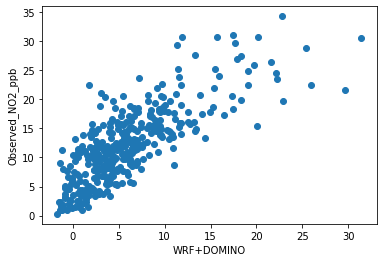

In [10]:
plt.scatter(X,Y)
plt.xlabel('WRF+DOMINO')
plt.ylabel('Observed_NO2_ppb')

In [11]:
X_const = sm.add_constant(X)
X_const.head()

/Users/callaway/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,WRF+DOMINO
0,1.0,11.615223
1,1.0,11.472677
2,1.0,8.990372
3,1.0,11.919268
4,1.0,2.141366


In [12]:
est = sm.OLS(Y, X_const)
result_simple = est.fit()
result_simple.aic

2079.9621899902477

Now let's try estimating a model with **all** the predictors embedded:

In [13]:
X_all = df_all.loc[:,'WRF+DOMINO':'total_14000']
X_all_const = sm.add_constant(X_all)
est_all = sm.OLS(Y, X_all_const)
result_all = est_all.fit()
result_all.aic

1943.8860203123413

And now a model that is close to (but not exactly the same as) Novotny's

In [14]:
X_base = df_all[novotny_features]

X_base_const = sm.add_constant(X_base)
est_base = sm.OLS(Y, X_base_const)
results_base = est_base.fit()
results_base.aic

1894.6813213241203

Let's call that the 'base' AIC.  

### Adding nonlinear features
What if we add a nonlinear predictor?  

One of the things Novotny claims to be missing is traffic volume.  They use road density instead.  

What if we try adding a variable that is people per km of road?

In [15]:
to_add = pd.Series(df_all.loc[:,'Population_800'] / (df_all.loc[:,'total_800']))

In [16]:
# check for infs and nans:
print('infs: ', np.sum(np.isinf(to_add)))
print('NaNs: ', np.sum(np.isnan(to_add)))

infs:  3
NaNs:  2


In [17]:
# let's fix the missing / inf data
to_add.loc[np.isnan(to_add)] = 0
to_add.loc[np.isinf(to_add)] = 0

In [19]:
X_base_const_new = X_base_const
X_base_const_new['pop_per_road_800'] = to_add

est_base_popperroad = sm.OLS(Y, X_base_const_new)
results_base_popperroad = est_base_popperroad.fit()
results_base_popperroad.aic

1891.588653941647

That's a small improvement.

Novotny also don't include population in the model.  I tried a few versions of population -- linear to start.  But what about this one:  population^(1/4)

In [20]:
to_add = pd.Series(df_all.loc[:,'Population_800']**(0.25))

X_base_pop4root_const = X_base_const.assign(pop_4root = to_add.values)

est_base_pop4root = sm.OLS(Y, X_base_pop4root_const)
results_base_pop4root = est_base_pop4root.fit()
results_base_pop4root.aic

1874.9162662822366

In [ ]:
print(results_base_pop4root.summary())

Even better!